In [1]:
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import plotly.io as pio
# from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash

In [2]:
# set template
pio.templates["WH"]=go.layout.Template(
layout_annotations=[
    dict(
        name="draft watermark",
        text="WH",
        textangle=0,
        opacity=0.1,
        font=dict(color="grey",size=30),
        xref="paper",
        yref="paper",
        x=1,
        y=0.2,
        showarrow=False
    )
]
)

pio.templates.default = "simple_white+WH"

In [3]:
# Load data and explore the top 5 rows
df=pd.read_excel("Copy of MicrobeScope 2018 - public datasheet.xlsx",sheet_name="DATA_full",header=1,
                 skiprows=lambda x: x in[2])
# print(df.head())

- there are both categorical data and numerical data
- Dataset has missing values represented by "-"

In [4]:
# replace missing values with NaN
df.replace('-',np.nan,inplace=True)

In [ ]:
# print(df.info())

 -Dataset has 79 rows and 49 columns with data types of integer, float and object.

In [5]:
# check duplication
for isDuplicate in df.duplicated():
    if isDuplicate== True:
        print(isDuplicate)

In [6]:
# change column names
dic={'R0':'Contagiousness','CFR_adult':'Deadliness','Hits':'Awareness','Hits_news':'Media Coverage',
     'Incidence_raw':'New Cases P/Y','Fatal_raw':'Fatalities','Prevalence_raw':'No. of Sufferers','Mode':'Transmission'}
df.rename(dic,axis=1,inplace=True)
# df.columns

In [ ]:
# df.loc[~df['Sublabel'].isnull(),['Name','Sublabel']]

In [ ]:
# Investigate rows with same Names

In [7]:
len(df['Name'].unique())

66

In [8]:
# a list c to contain same name with multiple entries
c=[]
for idx, name in enumerate(df['Name'].value_counts().index.tolist()):
    if df['Name'].value_counts()[idx]>1:
        c.append(name)
len(c)

11

In [9]:
# Investigate one by one since there are only 11 of them 
# most of them have different Sublabel with different data, can treat as different deseases
# only show suspicious ones 
i=c[3]
df[df['Name']==i] 

,ID,Name,Sublabel,Pathogen_type,Contagiousness,Deadliness,Biosafety,Survive_surfaces,Survive_ideal,CFR_adult_grp,...,Fatal_US,Fatal_Eur,Fatal_Af,Peak,Peak_year,Vulnerable,Hotspots,Treatment,Effectiveness,Resistance
38,38,Meningitis,"(meningococcal, treated)",bacterium,1.3,0.115000,2,NaN,NaN,Moderate,...,369.818808,1618.064728,66043.0,NaN,NaN,"Babies, preschool children, young people",The 'meningitis belt' – an area of sub-Saharan...,"Antibiotics including penicillin, ampicillin a...",Limited.,NaN
75,75,Meningitis,"(meningococcal, all)",bacterium,1.3,0.375972,2,NaN,NaN,Moderate,...,369.818808,1618.064728,66043.0,NaN,NaN,"Babies, preschool children, young people",The 'meningitis belt' – an area of sub-Saharan...,"Antibiotics including penicillin, ampicillin a...",Limited.,NaN


In [10]:
df['Contagiousness'].describe()

count     74.000000
mean       4.920270
std       13.482408
min        0.000000
25%        1.025000
50%        2.000000
75%        4.275000
max      115.000000
Name: Contagiousness, dtype: float64

In [11]:
# both Malaria rows are the same except the Contagiousness
# contagiousness=115 and 17 are both very high compaired with other deseases in this dataset (mean=4.9)
# delete the one with 115(outlier)
df.drop(index=35,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
df.columns

Index(['ID', 'Name', 'Sublabel', 'Pathogen_type', 'Contagiousness',
       'Deadliness', 'Biosafety', 'Survive_surfaces', 'Survive_ideal',
       'CFR_adult_grp', 'CFR_child', 'Awareness', 'Media Coverage', 'I_news',
       'I_yucky', 'I_fear', 'I_ignored', 'I_attention', 'I_notoriety',
       'Transmission', 'Dose', 'Dose_grp', 'Dose_type', 'Incubation',
       'Incubation_range', 'Incidence', 'New Cases P/Y', 'Incidence_US',
       'Incidence_Eur', 'Incidence_Af', 'Prevalence', 'No. of Sufferers',
       'DALYs', 'DALYs_raw', 'DALYs_US', 'DALYs_Eur', 'DALYs_Af', 'Fatal',
       'Fatalities', 'Fatal_US', 'Fatal_Eur', 'Fatal_Af', 'Peak', 'Peak_year',
       'Vulnerable', 'Hotspots', 'Treatment', 'Effectiveness', 'Resistance'],
      dtype='object')

In [12]:
df['CFR_adult_grp'].unique()

array(['Low', 'Moderate', 'High', 'Very high', 'Virtually zero',
       'Very low', nan, 'Virtually certain'], dtype=object)

In [13]:
scat_x=['Contagiousness','Awareness','Media Coverage','New Cases P/Y','Fatalities','No. of Sufferers']
scat_y=['Deadliness','Awareness','Media Coverage','New Cases P/Y','Fatalities','No. of Sufferers']

In [14]:
import seaborn as sns

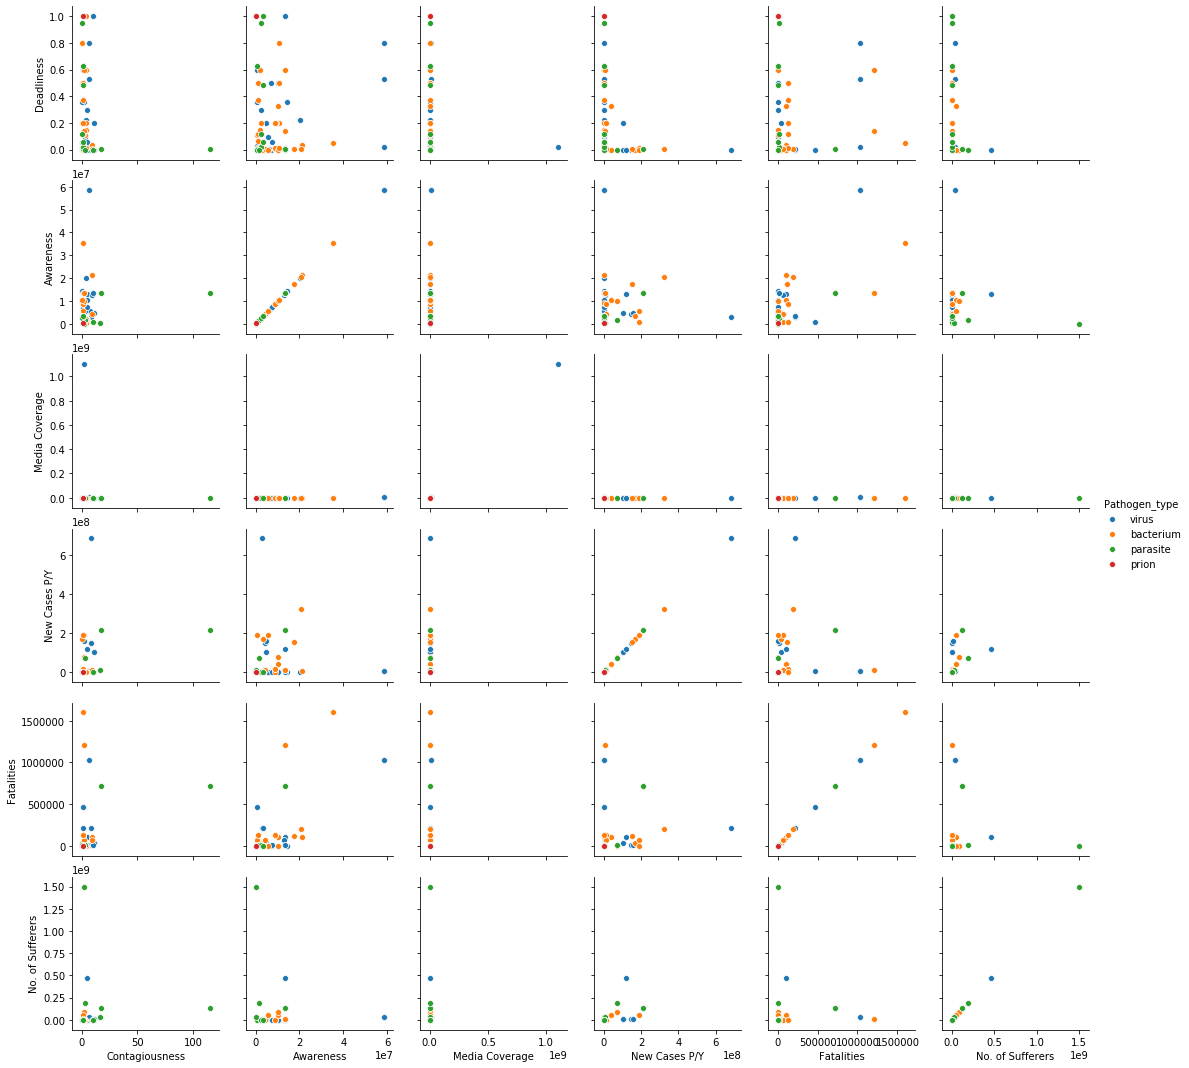

In [15]:
sns.pairplot(df,hue='Pathogen_type',x_vars=scat_x,y_vars=scat_y)

In [16]:
# drop the prion pathogen type as it is not representative (only 1 count)
df.drop(index=df[df['Pathogen_type']=='prion'].index,inplace=True)
df.reset_index(drop=True,inplace=True)
df['Pathogen_type'].value_counts()

bacterium    32
virus        32
parasite     14
Name: Pathogen_type, dtype: int64

In [17]:
MicrobeType=df['Pathogen_type'].unique().tolist()
MicrobeType

['virus', 'bacterium', 'parasite']

In [18]:

# df['Transmission'].unique()
dic_transmission={'air droplets':'airbome',
                 'fecal-oral':'facal-oral',
                 'food and water':'food',
                 'bites':'bites',
                 'body fluids':'body fluids',
                 'other':'other'}
df.replace(dic_transmission,inplace=True)
transmission=df['Transmission'].unique().tolist()
transmission

['airbome', 'facal-oral', 'food', 'bites', 'body fluids', 'other']

In [20]:

app=dash.Dash()
app.layout=html.Div([
                    # title
                    html.H1(children='The MicroScope',style={'textAlign':'left'}),  
    
                
                    # checklist_transmission type
                    html.Div([
                            html.Label('Transmission Type',
                                      style=dict(fontsize=10,color='grey')),
                            dcc.RadioItems(
                                        id='transmission type',
                                        options=[{'label':i,'value':i} for i in df['Transmission'].unique()]+
                                        [{'label':'ALL','value':'ALL'}],
                                        value='ALL',                                        
                                        labelStyle={'display':'inline-block'}
                                        )
                               ],
                            style={'float':'right','margin-right':50,'width':300
                                   }),     

    
                    # trend line box
                    html.Div([
                            html.Label('Trend line',
                                       style=dict(fontsize=10,color='grey')),
                            dcc.RadioItems(
                                        id='trendline',
                                        options=[{'label':'On','value':'On'},
                                                 {'label':'Off','value':'Off'}],
                                        value='Off',                                        
                                        labelStyle={'display':'inline-block'}
                                        )
                               ],
                            style={'float':'right','margin-right':100,
                                   'width':100}),
 
    
                    # y axis dropdown
                    html.Div([
                            dcc.Dropdown(
                            id='yaxis',
                            options=[{'label': i.title(), 'value': i} for i in scat_y],
                            value='Deadliness'
                                        )
                             ],
                            style={'width': '15%', 'margin-left': 10,'display': 'inline-block'}),
 
    
                    html.P(),

    
                    # graph
                    dcc.Graph(id='feature-graphic',),
        
                    # x axis dropdown
                    html.Div([
                            dcc.Dropdown(
                            id='xaxis',
                            options=[{'label': i.title(), 'value': i} for i in scat_x],
                            value='Contagiousness'
                                        )
                             ],
                            style={'width': '15%', 'margin-left': 800,'display': 'inline-block'}),
                     ],
    
                    style={'padding':5}
                    )


@app.callback(
    Output('feature-graphic', 'figure'),
    [Input('xaxis', 'value'),
     Input('yaxis', 'value'),
     Input('trendline','value'),
     Input('transmission type','value'),
        ])
def update_fig(xaxis_name,yaxis_name,trend_line,trans_type):
    
    if trend_line=='On':
        a='ols'
    else:
        a=None
    if trans_type=='ALL':
        dff=df
    else:
        dff=df[df['Transmission']==trans_type]
    
    
    fig=px.scatter(dff,x=xaxis_name,y=yaxis_name,hover_name='Name',
                    color='Pathogen_type',
                    color_discrete_map={"virus": "rgb(72,209,204)", 
                                       "bacterium": "rgb(233,150,122)",
                                      "parasite":"rgb(128,128,0)"},    
                    trendline=a, )
        

    fig.update_layout(
                      yaxis_zeroline=True,
                      xaxis_zeroline=True,
                     
                      legend_title='Pathogen type',
                      legend_title_font=dict(size=12,color='grey'),
                      legend=dict(
                                  orientation='h',
                                  yanchor='bottom',
                                  y=1.02,
                                  xanchor='right',
                                  x=0.4),
                      )
    

    
    if yaxis_name=='Deadliness':
        fig.update_yaxes(type='log',range=[-4.5,0.3],showgrid=True,zerolinecolor='black',zerolinewidth=0.5,tick0=0,
                        dtick=1,tickformat='.2%',)
        fig.update_xaxes(showgrid=True,zerolinecolor='black',zerolinewidth=0.5,
                    tick0=0,)
        fig.add_hrect(y0=0.5, y1=1, line_width=0, fillcolor="#bb1919", opacity=0.09,
                     )        
        
        fig.add_hrect(y0=0.2, y1=0.5, line_width=0, fillcolor="#ef8888", opacity=0.08,
                )
        fig.add_annotation(xref='x domain',
                            yref='y domain',
                           x=0.98,
                           y=0.95,
                           text='extremly deadly',
                           showarrow=False, 
                           font=dict(
                                color="black",
                                        size=12
                            ))
        fig.add_annotation(xref="x domain",
                            yref="y domain",
                  x=0.95, y=0.88,text='deadly',showarrow=False, font=dict(
                color="black",
                size=12
            ))

        fig.add_hline(y=0.2,line_width=0.5,line_color='black')
        fig.add_hline(y=0.5,line_width=0.5,line_color='black')
        fig.add_annotation(xref="x domain",
                            yref="y domain",
                           x=-0.035, y=0.82,
                           text='20.00%',showarrow=False, 
                           font=dict(
                            color="black",
                                size=12
            ))
        fig.add_annotation(xref="x domain",
                            yref="y domain",
                            x=-0.035, 
                           y=0.9,text='50.00%',
                           showarrow=False, 
                           font=dict(
                            color="black",
                            size=12
            ))
    else:
        fig.update_xaxes(showgrid=True,zerolinecolor='black',zerolinewidth=0.5,
                    tick0=0,ticklabelposition='inside top')
        fig.update_yaxes(showgrid=True,zerolinecolor='black',zerolinewidth=0.5,
                    tick0=0,ticklabelposition='inside right')
    
        
    return fig


app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
